# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

## Carga de datos

In [31]:
import pandas as pd 
import numpy as np

In [32]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [33]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [35]:
df_data.TotalCharges=pd.to_numeric(df_data.TotalCharges,errors='coerce')

## Manejo de datos nulos

In [36]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [37]:
df_data.dropna(inplace=True)

## Eliminar id

In [38]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
df_data.drop('customerID',axis=1,inplace=True)

## Convertir a numérico variable objetivo

In [40]:
df_data["Churn"].replace(to_replace="Yes",value=1,inplace=True)
df_data["Churn"].replace(to_replace="No",value=0,inplace=True)

In [41]:
df_data_processing = df_data.copy()
df_data_processing

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## Manejo de variables categóricas

In [42]:
df_data_processing=pd.get_dummies(df_data_processing,drop_first=True)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Analisis de correlación

In [43]:
import matplotlib.pyplot as plt

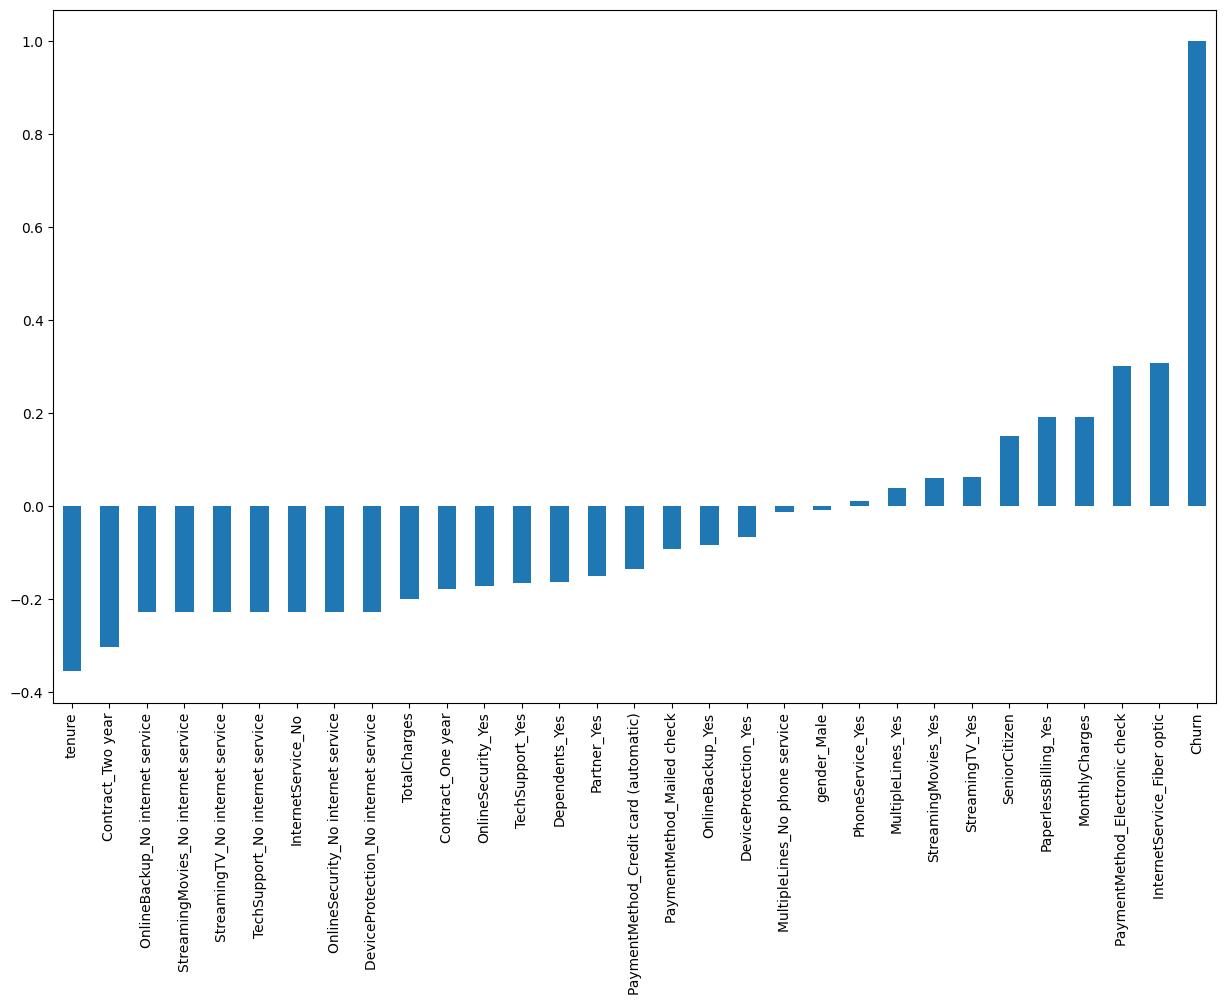

In [44]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [47]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [48]:
df_data_processing_scaled.columns = df_data_processing.columns

In [49]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Análisis exploratorio de datos

In [50]:
import seaborn as sns

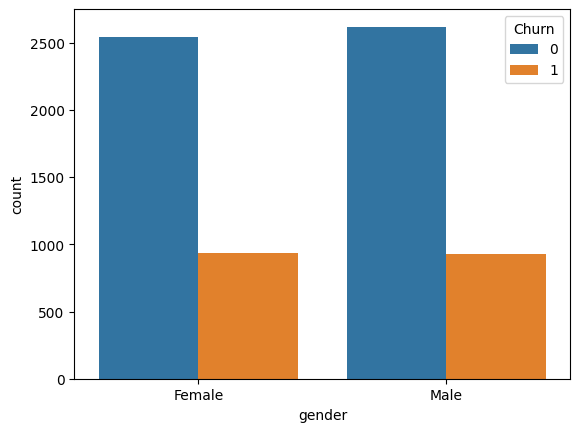

In [51]:
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

In [52]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

In [53]:
column_cat = df_data.select_dtypes(include='object').columns

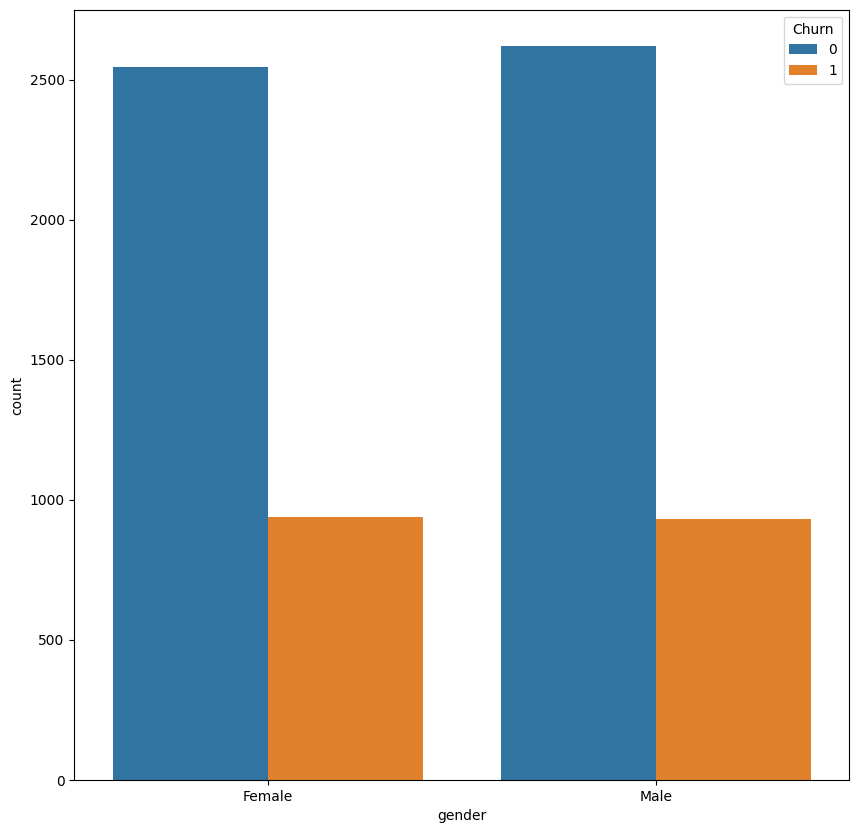

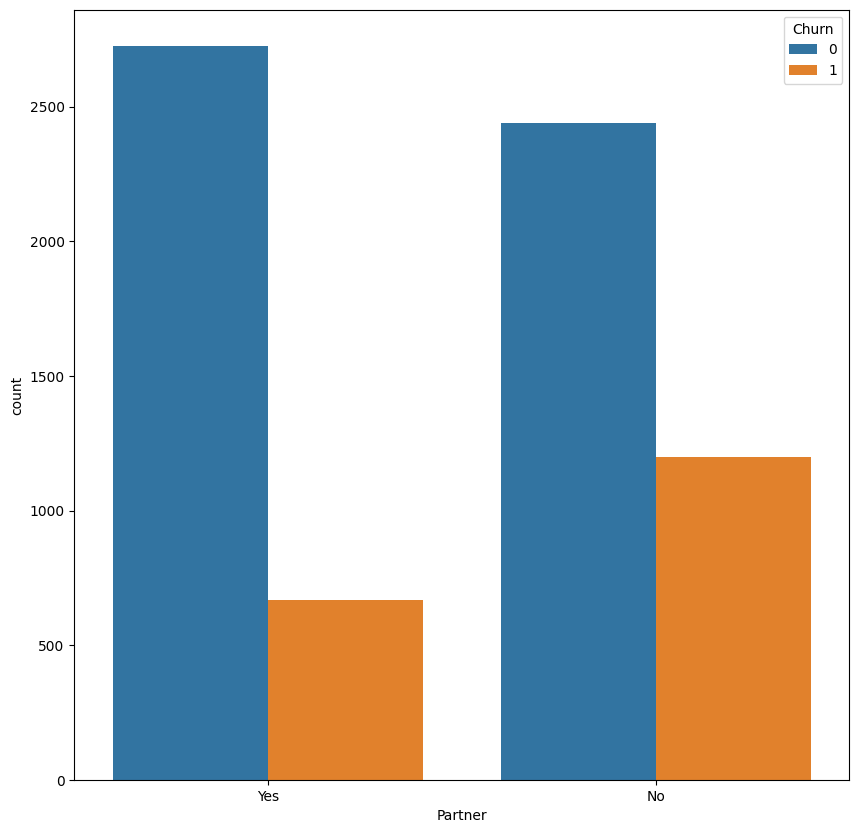

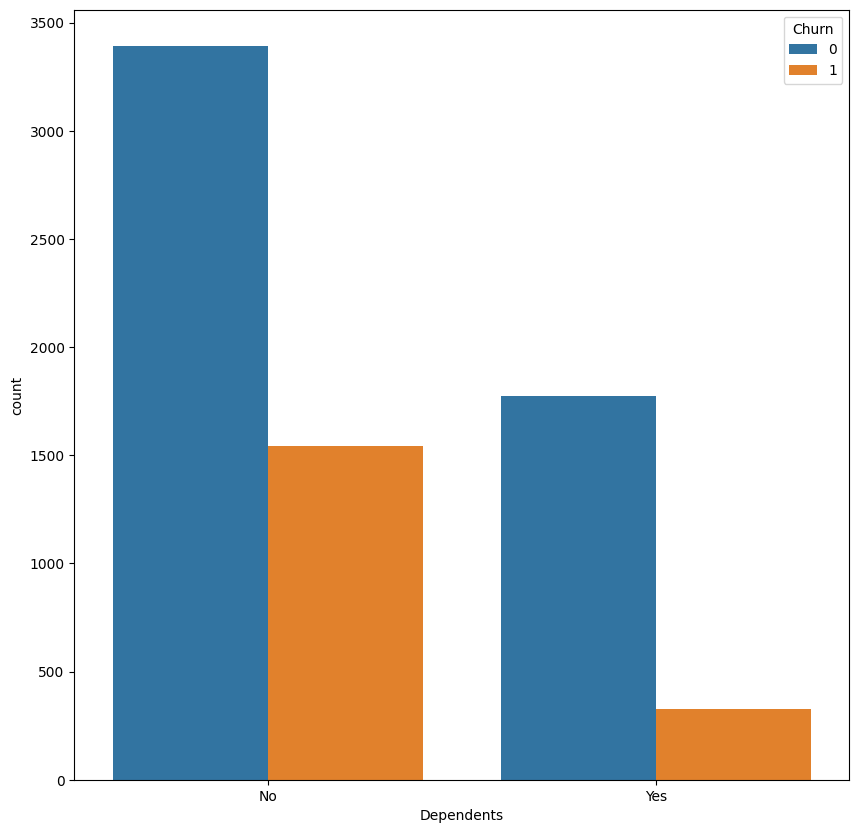

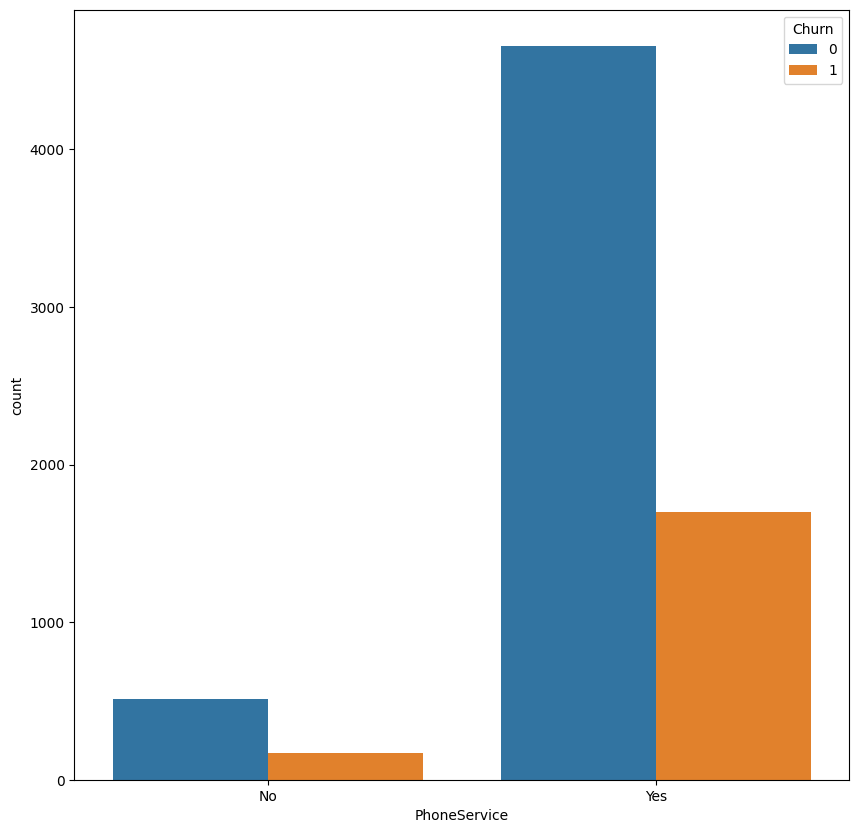

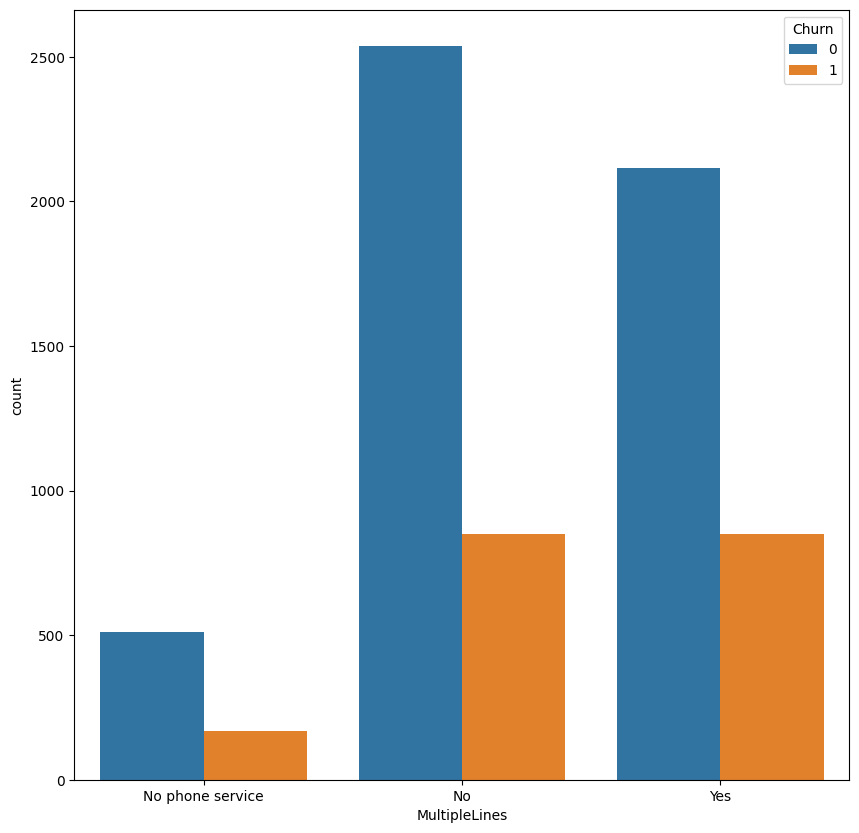

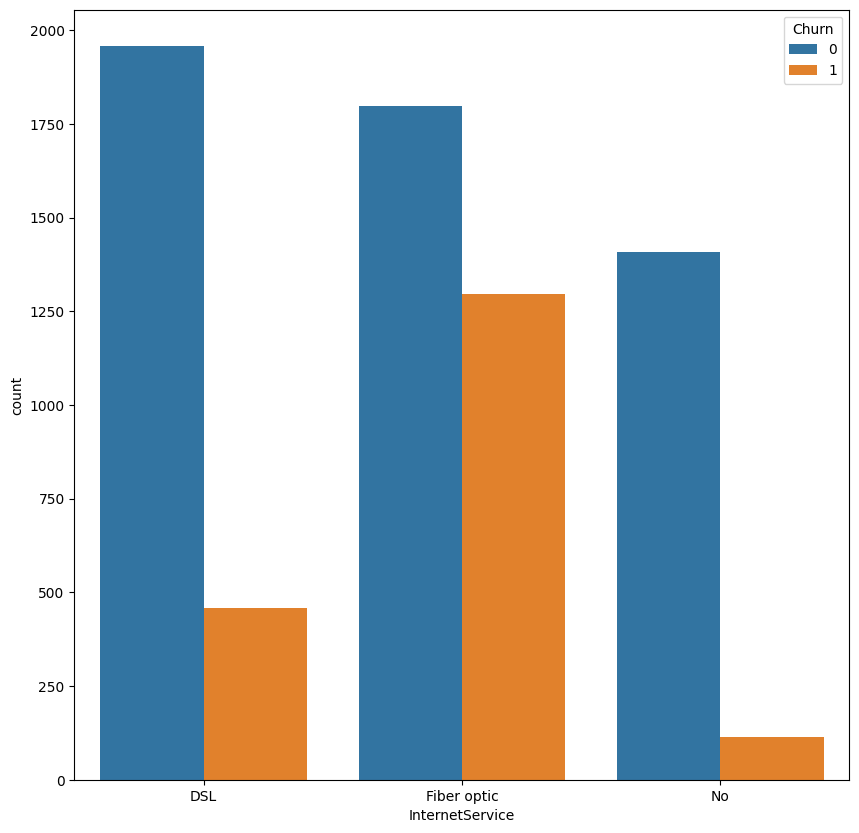

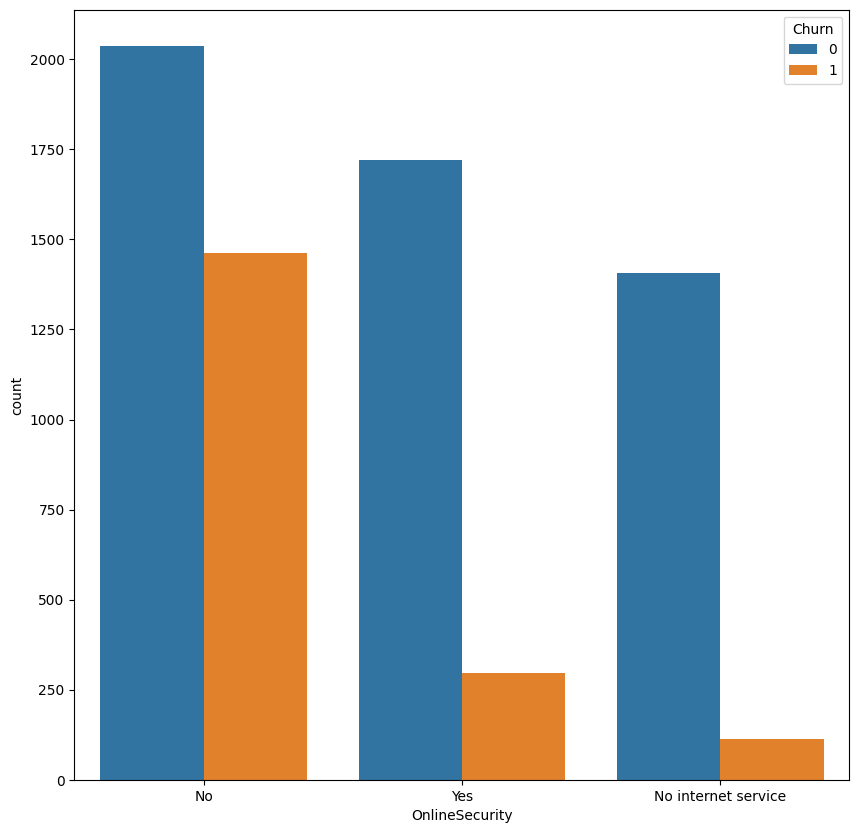

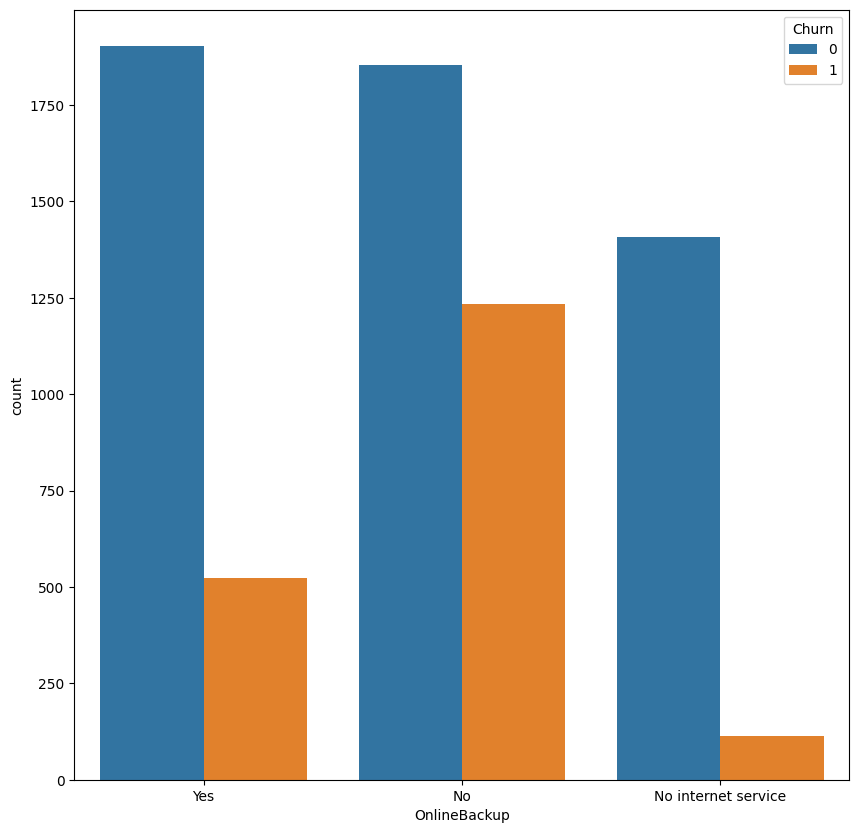

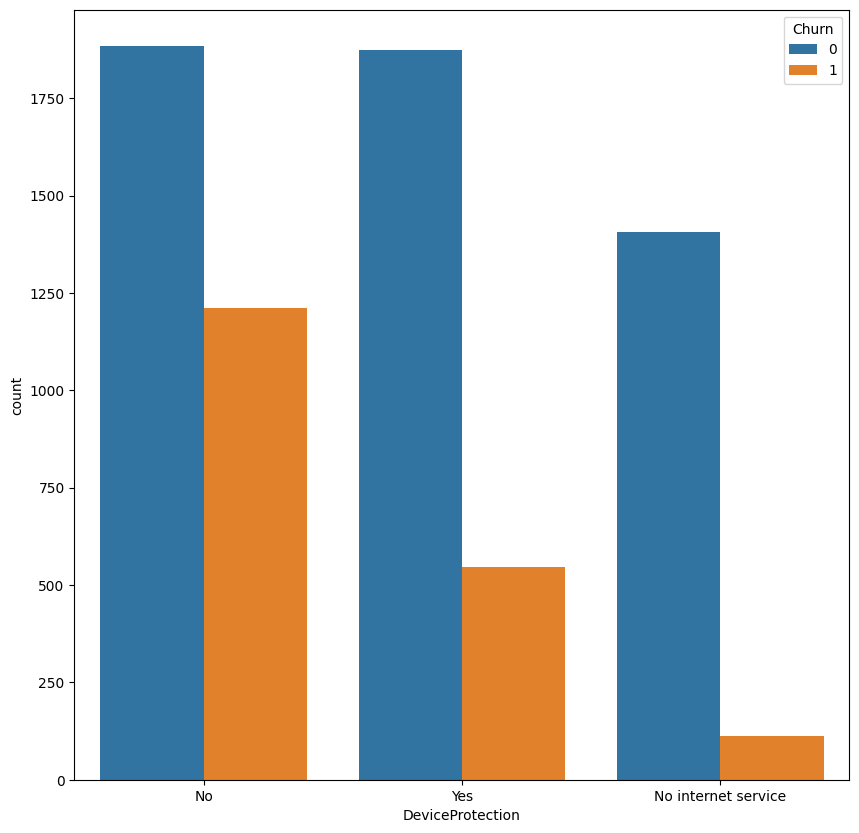

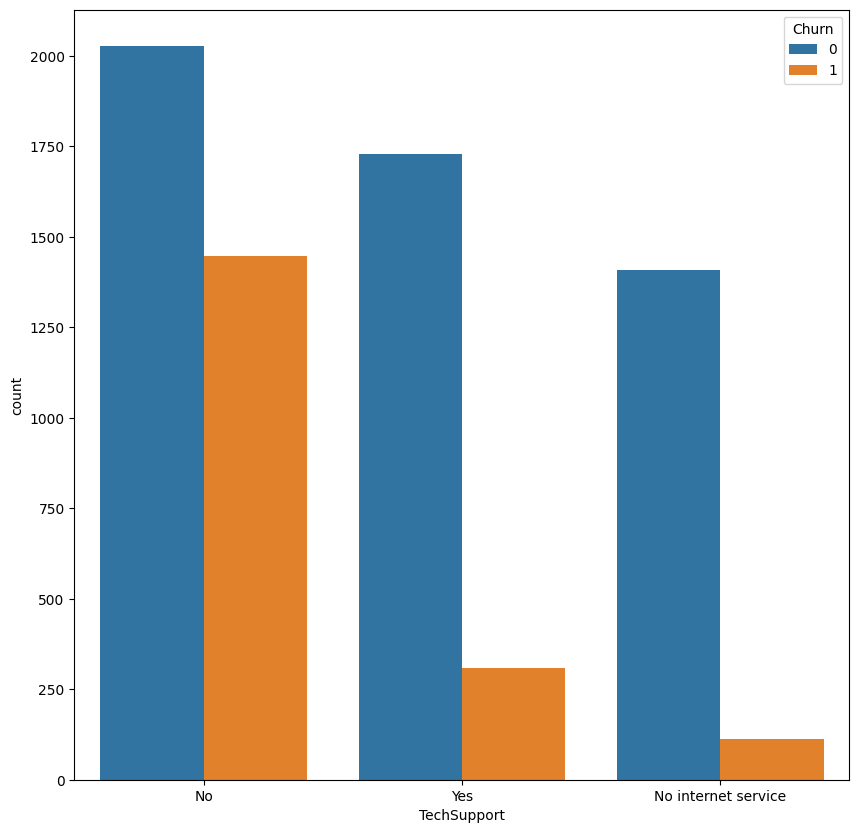

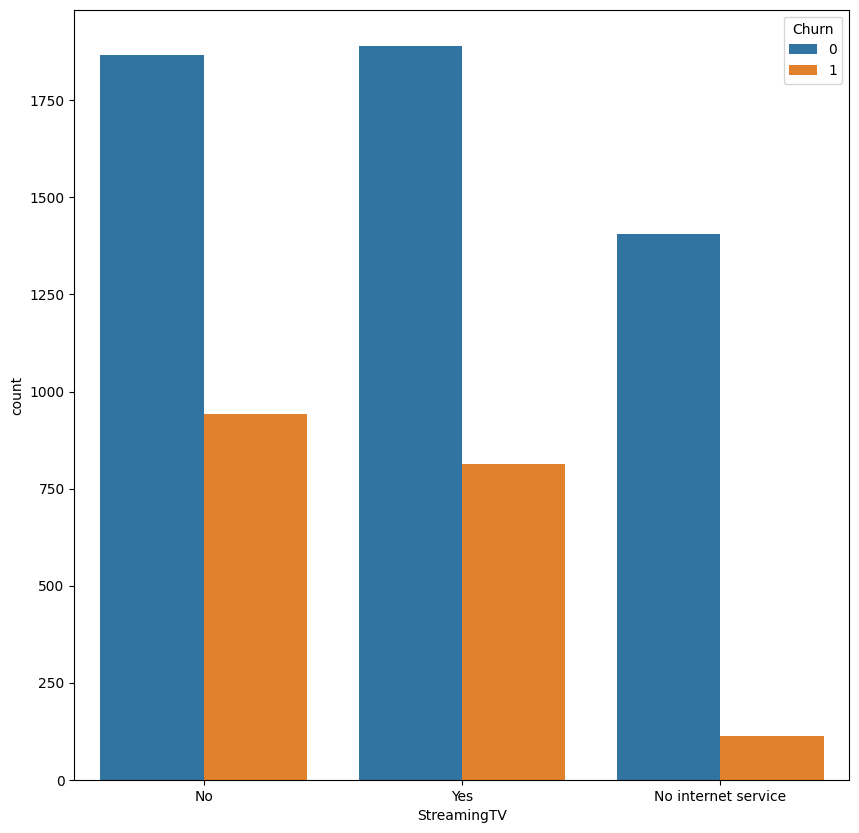

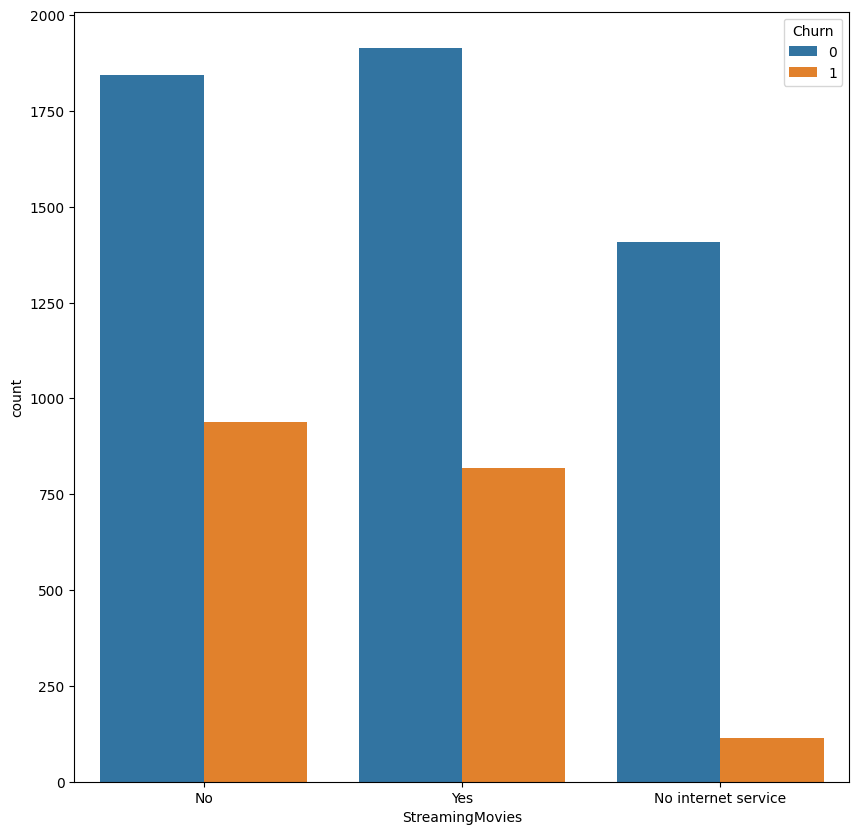

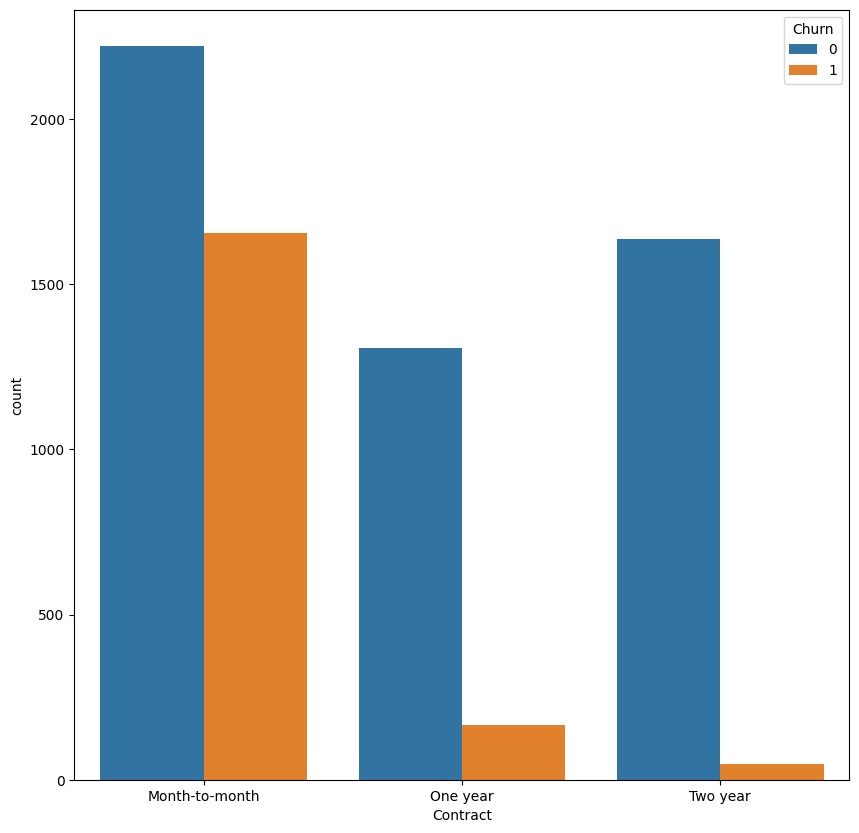

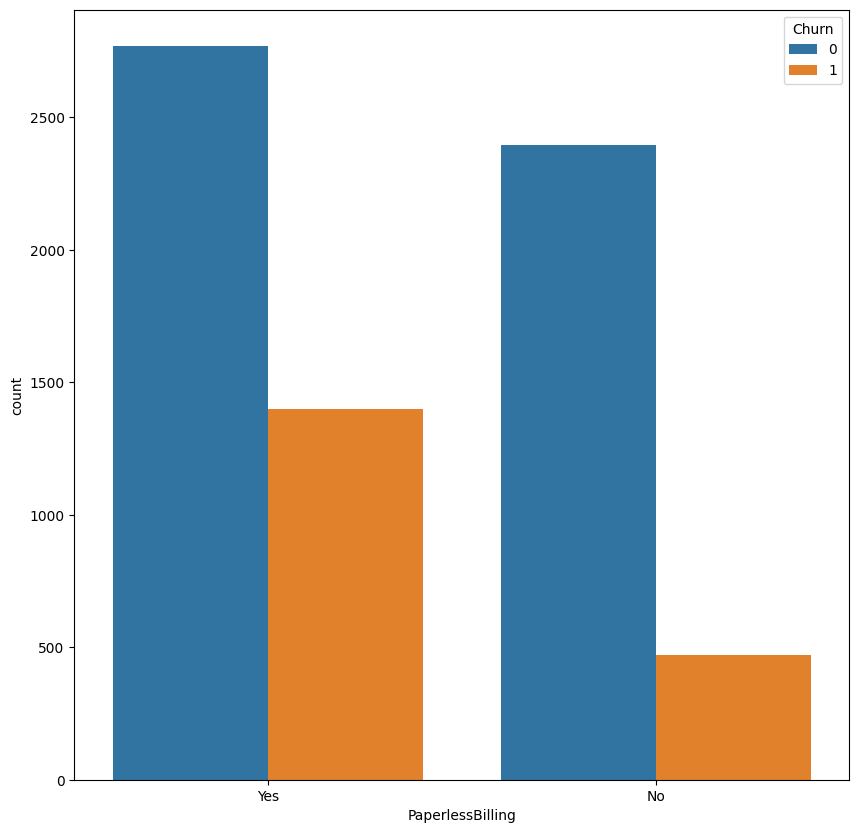

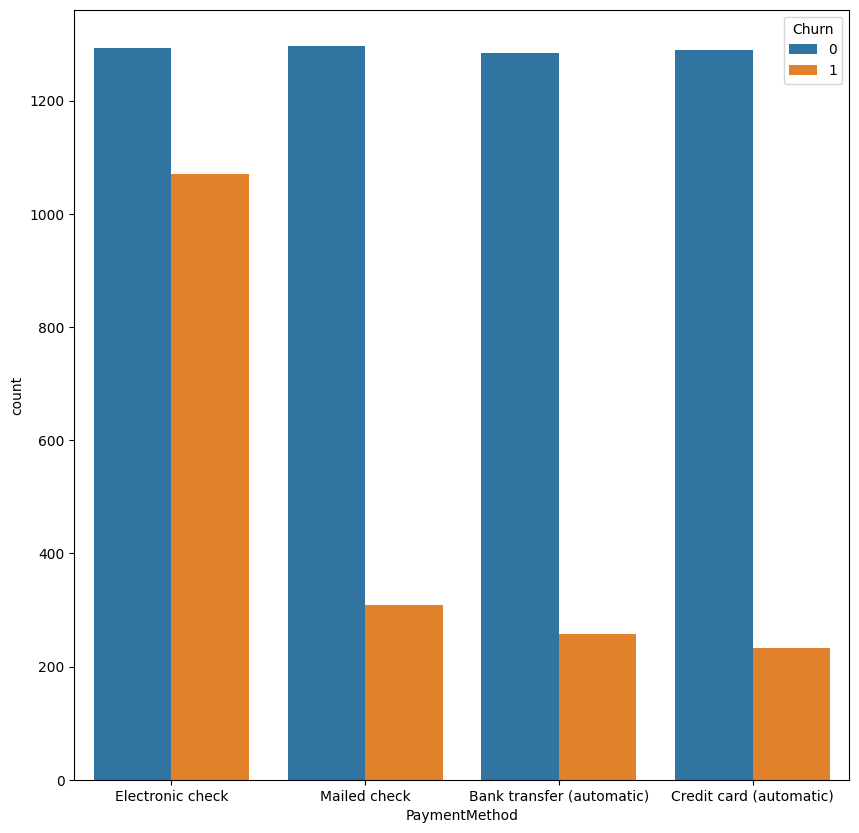

In [54]:
for _ in column_cat:
    plot_categorial(_)

<Figure size 1000x1000 with 0 Axes>

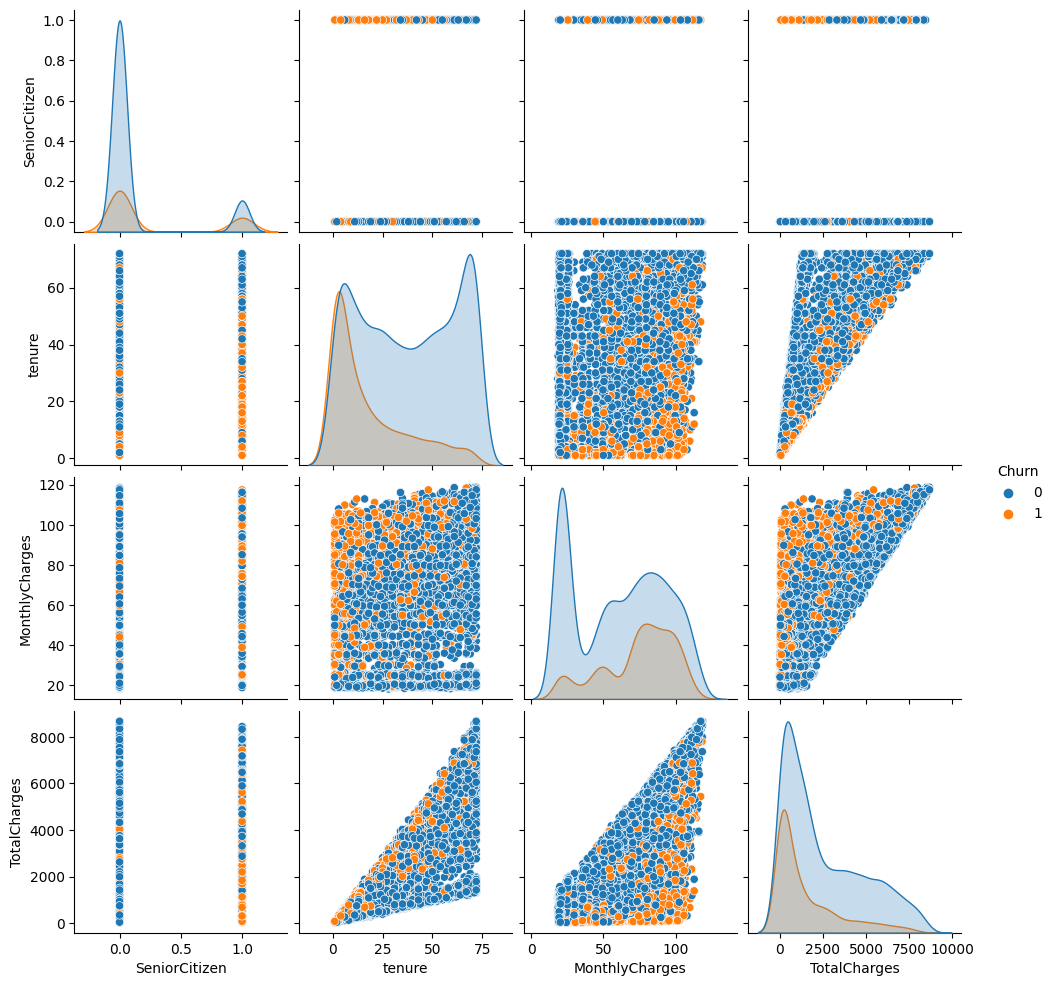

In [55]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [56]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [59]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795734597156398


## Evaluación del modelo

In [60]:
model.predict_proba(X_test)

array([[0.9900733 , 0.0099267 ],
       [0.86260748, 0.13739252],
       [0.30246025, 0.69753975],
       ...,
       [0.99015604, 0.00984396],
       [0.70085651, 0.29914349],
       [0.82812473, 0.17187527]])

In [61]:
model.coef_

array([[ 0.22035058, -3.12507861, -0.10677561,  1.20430842, -0.0231496 ,
         0.1211656 , -0.25563979, -0.22952716,  0.21292584,  0.21033512,
         0.91161368, -0.11549255, -0.11549255, -0.38784332, -0.11549255,
        -0.07610719, -0.11549255, -0.02221961, -0.11549255, -0.35122839,
        -0.11549255,  0.258926  , -0.11549255,  0.26175833, -0.82099263,
        -1.37880107,  0.20788667, -0.15752054,  0.21943162, -0.07633099]])

In [62]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

AxesSubplot(0.125,0.11;0.775x0.77)


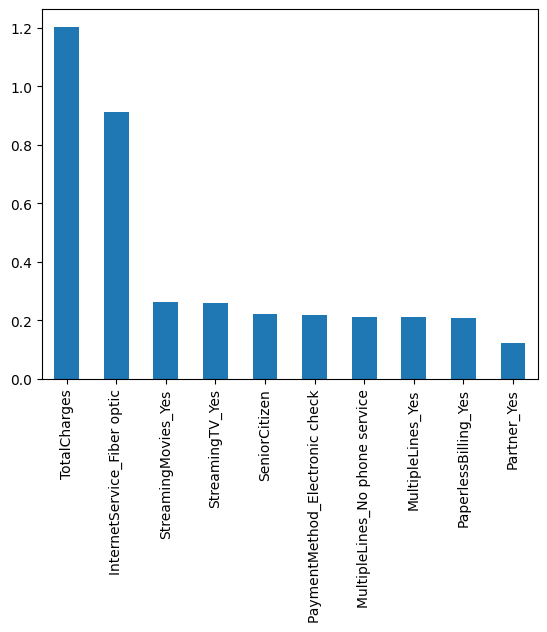

In [63]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.11;0.775x0.77)


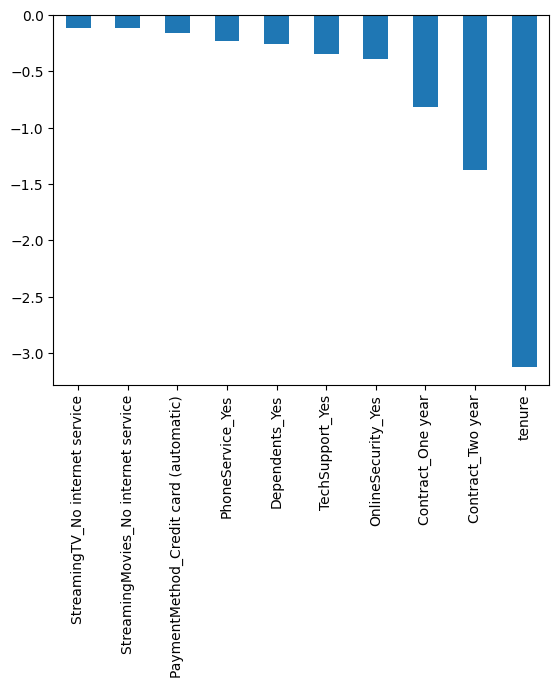

In [64]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

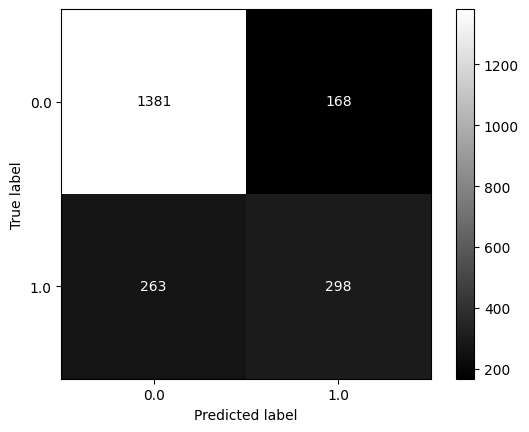

In [66]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

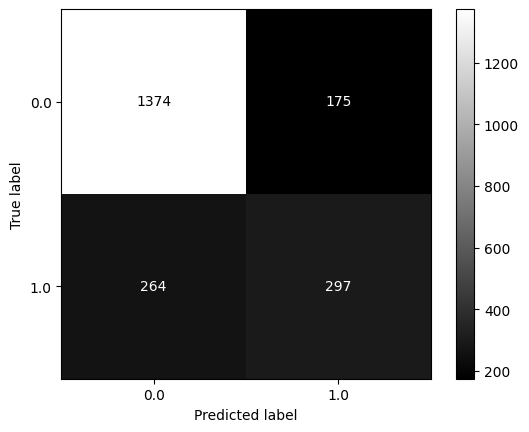

Accuracy model:  0.7919431279620853
Recall Churn='NO':  0.8870238863783085
Recall Churn='YES':  0.5294117647058824


In [67]:
df_data['Churn'].replace(to_replace=['Yes', 'No'], value = [1,0], inplace = True)

#Eliminamos los features que no presentan un alto grado de correlacion
df_data2 = df_data.copy()
df_data2 = df_data2.drop(['gender', 'MultipleLines', 'PhoneService', 'StreamingMovies', 'StreamingTV'], axis=1)

#Convertimos las variables categoricas a numericas y normalizamos los datos
df_data2 = pd.get_dummies(df_data2)
df_scaled_r = scaler.fit_transform(df_data2)
df_scaled_r = pd.DataFrame(df_scaled_r)
df_scaled_r.columns = df_data2.columns

#Dividimos el dataset en features y el target de nuestro modelo
x_r = df_scaled_r.drop(['Churn'], axis=1)
y_r = df_scaled_r['Churn']

#Dividimos el dataset
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_r,y_r,train_size=0.7, random_state=42)

#Creamos el modelo
model_r = LogisticRegression()
model_r.fit(x_train_r, y_train_r)
pred_r = model_r.predict(x_test_r)

#Visualizamos los resultados
cm_r = confusion_matrix(y_test_r, pred_r, labels=model_r.classes_)
disp_r = ConfusionMatrixDisplay(confusion_matrix=cm_r, display_labels=model_r.classes_)
disp_r.plot(cmap='gray')
plt.show()

print("Accuracy model: ", metrics.accuracy_score(y_test_r, pred_r))
print("Recall Churn='NO': ", metrics.recall_score(y_test_r, pred_r, pos_label=0))
print("Recall Churn='YES': ", metrics.recall_score(y_test_r, pred_r, pos_label=1))

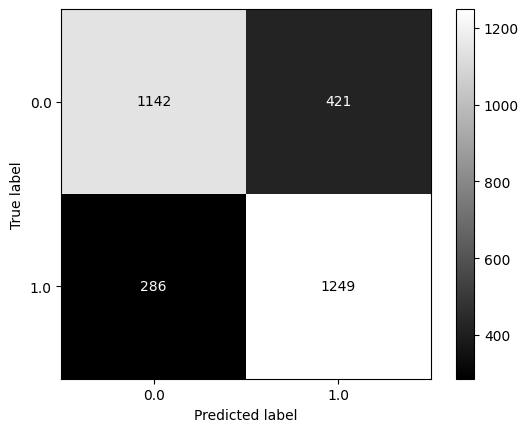

Accuracy model:  0.7717882504841833
Recall Churn='NO':  0.7306461932181701
Recall Churn='YES':  0.8136807817589576


In [71]:
from imblearn.over_sampling import SMOTE
df_data['Churn'].replace(to_replace=['Yes', 'No'], value = [1,0], inplace = True)

#Eliminamos los features que no presentan un alto grado de correlacion
df_data2 = df_data.copy()
df_data2 = df_data2.drop(['gender', 'MultipleLines', 'PhoneService', 'StreamingMovies', 'StreamingTV'], axis=1)

#Convertimos las variables categoricas a numericas y normalizamos los datos
df_data2 = pd.get_dummies(df_data2)
df_scaled_r = scaler.fit_transform(df_data2)
df_scaled_r = pd.DataFrame(df_scaled_r)
df_scaled_r.columns = df_data2.columns

#Dividimos el data set en features y el target de nuestro modelo
x_r = df_scaled_r.drop(['Churn'], axis=1)
y_r = df_scaled_r['Churn']

#Aplicamos balanceo de clases con SMOTE
oversample_r = SMOTE()
x_rsmote, y_rsmote = oversample_r.fit_resample(x_r, y_r)

#Dividimos el dataset
x_train_rsmote, x_test_rsmote, y_train_rsmote, y_test_rsmote = train_test_split(x_rsmote,y_rsmote,train_size=0.7, random_state=42)

#Creamos el modelo
model_rsmote = LogisticRegression()
model_rsmote.fit(x_train_rsmote, y_train_rsmote)
pred_rsmote = model_rsmote.predict(x_test_rsmote)

#Visualizamos los resultados
cm_rsmote = confusion_matrix(y_test_rsmote, pred_rsmote, labels=model_rsmote.classes_)
disp_rsmote = ConfusionMatrixDisplay(confusion_matrix=cm_rsmote, display_labels=model_rsmote.classes_)
disp_rsmote.plot(cmap='gray')
plt.show()

print("Accuracy model: ", metrics.accuracy_score(y_test_rsmote, pred_rsmote))
print("Recall Churn='NO': ", metrics.recall_score(y_test_rsmote, pred_rsmote, pos_label=0))
print("Recall Churn='YES': ", metrics.recall_score(y_test_rsmote, pred_rsmote, pos_label=1))